# Trabajo Práctico 1 - Laboratorio de Datos - 1C 2025

**Integrantes del grupo:**

In [46]:
# Descomentar y correr esto una sola vez
#!pip install formulaic

In [1]:
# Si requieren mas librerias, pueden importarlas aca
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import seaborn.objects as so
import json
import plotly.express as px
from formulaic import Formula
from sklearn import linear_model  
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error  

# Si no existe root_mean_squared_error, quitarlo o actualizar scikit-learn con el comando
#!pip install scikit-learn --upgrade

In [2]:
df_educacion = pd.read_csv('indicadores-proceso-trayectoria-sobreedad-2012_2022.csv')
df_educacion

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,alumnos_no_promovidos_primaria,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,1.45,18.54,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.70,9.48,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.69,9.13,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,1.47,8.62,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,1.58,6.95,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2018,6882,Zarate,95.42,87.30,3.83,8.27,0.06,1.80,0.69,...,2.28,12.39,0.09,2.37,2.42,3.58,7.91,28.77,2.06,11.73
1481,2019,6882,Zarate,95.62,86.58,3.55,9.53,0.01,0.83,0.82,...,1.97,13.63,0.08,0.51,3.30,3.67,8.10,27.71,1.89,10.12
1482,2020,6882,Zarate,99.51,99.06,0.04,0.00,0.00,0.09,0.45,...,0.00,0.58,0.03,0.05,3.12,3.62,6.81,28.88,1.65,11.53
1483,2021,6882,Zarate,96.77,90.87,2.79,6.60,0.17,0.64,0.28,...,0.21,8.23,0.03,0.25,1.28,0.66,4.50,27.81,0.89,11.15


### Procesamiento de Datos

In [3]:
zona_norte = ['San Isidro', 'Vicente Lopez', 'General San Martin', 'San Fernando', 'Tigre']
zona_oeste = ['Moron', 'Tres de Febrero', 'La Matanza', 'Merlo', 'Moreno']
zona_sur = ['Almirante Brown', 'Avellaneda', 'Quilmes', 'Lanus', 'Florencio Varela', 'Berazategui', 'Lomas de Zamora', 'Esteban Echeverria']


#Implementación de la funcion determinar_zona
def determinar_zona(zona):
    #Función que determina la zona de un municipio según su nombre.
    #Recibe como parámetro el nombre del municipio y devuelve la zona correspondiente.
    #El valor de retorno será una de las 3 zonas definidas o "Interior" si no se encuentra en ninguna de las listas.
    #Cada if busca el municipio en la lista correspondiente y devuelve la zona si lo encuentra, "Interior" en caso contrario.
    if zona in zona_norte:
        return 'Norte'
    elif zona in zona_oeste:
        return 'Oeste'
    elif zona in zona_sur:
        return 'Sur'
    else:
        return 'Interior'

**1:** Queremos describir el tipo de dato de cada variable.

In [4]:
df_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   anio                              1485 non-null   int64  
 1   municipio_id                      1485 non-null   int64  
 2   municipio_nombre                  1485 non-null   object 
 3   promocion_efectiva_primaria       1485 non-null   float64
 4   promocion_efectiva_secundaria     1485 non-null   float64
 5   repitencia_primaria               1485 non-null   float64
 6   repitencia_secundaria             1485 non-null   float64
 7   reinscripcion_primaria            1485 non-null   float64
 8   reinscripcion_secundaria          1485 non-null   float64
 9   abandono_interanual_primaria      1485 non-null   float64
 10  abandono_interanual_secundaria    1485 non-null   float64
 11  alumnos_promovidos_primaria       1485 non-null   float64
 12  alumno

In [5]:
df_educacion.describe()

,anio,municipio_id,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,abandono_interanual_secundaria,...,alumnos_no_promovidos_primaria,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.00000,1485.000000,1485.000000,1485.000000,1485.000000,...,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,2017.000000,6447.851852,97.130323,86.091710,2.401246,8.56738,0.160148,1.191549,0.308168,4.149293,...,1.582707,14.301926,0.126458,1.498808,3.593003,3.969670,7.144673,28.100391,1.373899,11.110882
std,3.163343,249.738307,1.978760,6.507016,1.397346,4.24956,0.305949,1.184820,1.222472,3.120094,...,1.055560,6.656939,0.166290,1.606285,1.304485,1.735492,3.189309,7.044230,1.029497,4.014572
min,2012.000000,6007.000000,87.100000,67.960000,0.000000,0.00000,0.000000,0.000000,-8.890000,-8.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,3.190000,0.000000,0.000000
25%,2014.000000,6238.000000,95.850000,81.450000,1.400000,6.02000,0.000000,0.340000,-0.240000,2.190000,...,0.810000,10.140000,0.000000,0.320000,2.860000,2.860000,4.810000,23.110000,0.580000,8.170000
50%,2017.000000,6448.000000,97.210000,85.440000,2.310000,8.96000,0.080000,0.890000,0.340000,4.090000,...,1.520000,15.150000,0.070000,1.010000,3.550000,3.810000,6.900000,28.310000,1.160000,11.130000
75%,2020.000000,6658.000000,98.450000,90.140000,3.330000,11.34000,0.190000,1.700000,0.890000,6.160000,...,2.250000,19.130000,0.190000,2.190000,4.340000,4.960000,8.890000,33.050000,1.900000,13.890000
max,2022.000000,6882.000000,107.220000,103.920000,10.480000,22.88000,6.600000,12.720000,7.140000,16.260000,...,8.870000,33.700000,1.150000,12.090000,10.660000,11.890000,19.420000,51.560000,6.120000,26.720000


Podemos ver claramente los tipos de las variables de cada columna:

Las columnas correspondientes al año y al id del municipio son enteros.
La columna que contiene los nombres de los municipios contiene variables de tipo objeto al ser strings.
El resto de las columnas contiene variables de tipo float64.

**2:**

Queremos ver si hay valores faltantes en el DataFrame.

In [8]:
df_educacion.isnull().sum()

anio                                0
municipio_id                        0
municipio_nombre                    0
promocion_efectiva_primaria         0
promocion_efectiva_secundaria       0
repitencia_primaria                 0
repitencia_secundaria               0
reinscripcion_primaria              0
reinscripcion_secundaria            0
abandono_interanual_primaria        0
abandono_interanual_secundaria      0
alumnos_promovidos_primaria         0
alumnos_promovidos_secundaria       0
alumnos_no_promovidos_primaria      0
alumnos_no_promovidos_secundaria    0
salidos_sin_pase_primaria           0
salidos_sin_pase_secundaria         0
salidos_con_pase_primaria           0
salidos_con_pase_secundaria         0
sobreedad_primaria                  0
sobreedad_secundaria                0
sobreedad_avanzada_primaria         0
sobreedad_avanzada_secundaria       0
zona                                0
dtype: int64

Podemos ver que no hay valores faltantes en el DataFrame.

**3:**

Ahora queremos saber a que zona pertenece cada municipio. Para ello agregamos una columna utilizando la función implementada "determinar_zona".

In [7]:
df_educacion["zona"] = df_educacion["municipio_nombre"].apply(determinar_zona)
df_educacion

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,alumnos_no_promovidos_secundaria,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria,zona
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,18.54,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28,Interior
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,9.48,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51,Interior
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,9.13,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17,Interior
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,8.62,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51,Interior
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,6.95,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24,Interior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2018,6882,Zarate,95.42,87.30,3.83,8.27,0.06,1.80,0.69,...,12.39,0.09,2.37,2.42,3.58,7.91,28.77,2.06,11.73,Interior
1481,2019,6882,Zarate,95.62,86.58,3.55,9.53,0.01,0.83,0.82,...,13.63,0.08,0.51,3.30,3.67,8.10,27.71,1.89,10.12,Interior
1482,2020,6882,Zarate,99.51,99.06,0.04,0.00,0.00,0.09,0.45,...,0.58,0.03,0.05,3.12,3.62,6.81,28.88,1.65,11.53,Interior
1483,2021,6882,Zarate,96.77,90.87,2.79,6.60,0.17,0.64,0.28,...,8.23,0.03,0.25,1.28,0.66,4.50,27.81,0.89,11.15,Interior


**4:**

Vamos a analizar si la la taza de repitencia es mayor en primaria que en secundaria.

Primero agregamos una columna que indique si ocurre esta situación(1 para si, 0 para no).

In [22]:
df_educacion["mayor_repitencia_primaria"] = df_educacion.apply(
    lambda x: 1 if x["repitencia_primaria"] > x["repitencia_secundaria"] else 0, axis=1
)
df_educacion.head(20)

,anio,municipio_id,municipio_nombre,promocion_efectiva_primaria,promocion_efectiva_secundaria,repitencia_primaria,repitencia_secundaria,reinscripcion_primaria,reinscripcion_secundaria,abandono_interanual_primaria,...,salidos_sin_pase_primaria,salidos_sin_pase_secundaria,salidos_con_pase_primaria,salidos_con_pase_secundaria,sobreedad_primaria,sobreedad_secundaria,sobreedad_avanzada_primaria,sobreedad_avanzada_secundaria,zona,mayor_repitencia_primaria
0,2012,6007,Adolfo Alsina,100.26,84.14,1.25,9.06,0.07,1.79,-1.57,...,0.00,2.71,5.40,2.90,12.61,26.77,4.01,12.28,Interior,0
1,2013,6007,Adolfo Alsina,97.35,86.84,1.68,5.31,0.13,0.12,0.84,...,0.30,2.77,5.02,5.72,10.27,26.27,3.42,11.51,Interior,0
2,2014,6007,Adolfo Alsina,97.36,80.79,2.23,2.52,0.07,0.43,0.34,...,0.13,2.11,4.84,4.31,8.46,25.06,2.51,9.17,Interior,0
3,2015,6007,Adolfo Alsina,96.00,91.55,2.41,5.24,0.21,0.85,1.38,...,0.33,2.49,4.96,4.64,7.16,30.85,1.86,10.51,Interior,0
4,2016,6007,Adolfo Alsina,97.67,95.56,2.61,7.27,0.07,1.29,-0.35,...,0.14,2.79,4.72,3.57,6.81,26.13,1.69,8.24,Interior,0
5,2017,6007,Adolfo Alsina,97.12,81.23,3.09,5.69,0.07,0.30,-0.28,...,0.13,2.41,4.44,4.76,7.78,18.64,1.75,7.93,Interior,0
6,2018,6007,Adolfo Alsina,94.94,86.14,4.08,11.06,0.21,0.37,0.77,...,0.20,0.60,5.67,4.88,8.27,20.88,1.54,6.77,Interior,0
7,2019,6007,Adolfo Alsina,96.15,90.43,3.64,4.82,0.00,0.18,0.21,...,0.00,1.92,3.26,6.67,6.56,19.27,1.14,7.93,Interior,0
8,2020,6007,Adolfo Alsina,98.82,98.17,0.63,0.32,0.07,0.13,0.49,...,0.07,0.13,5.01,5.71,5.78,17.03,0.90,6.18,Interior,1
9,2021,6007,Adolfo Alsina,97.82,91.86,2.86,4.54,0.07,0.32,-0.75,...,0.13,1.04,0.90,0.95,4.84,12.93,0.61,4.35,Interior,0


Ahora vamos a mostrar en una Serie de pandas cuantas veces entre los años 2017 y 2022 ocurre esto.

In [ ]:
df_educacion[df_educacion["anio"] == 2022]["mayor_repitencia_primaria"].sum()
mayor_repitencia_primaria = pd.Series(index = range(2017, 2023), dtype = int)
for i in range(2017, 2023):
    mayor_repitencia_primaria[i] = df_educacion[df_educacion["anio"] == i]["mayor_repitencia_primaria"].sum()

mayor_repitencia_primaria

2017      2.0
2018      3.0
2019      1.0
2020    102.0
2021     16.0
2022      6.0
dtype: float64

### Regresión

In [54]:
area_metropolitana = ['Almirante Brown', 'Avellaneda', 'Berazategui', 'Berisso', 'Brandsen', 'Campana', 'Cañuelas',
                      'Ensenada', 'Escobar', 'Esteban Echeverria', 'Exaltacion de la Cruz', 'Ezeiza',
                      'Florencio Varela', 'General Las Heras', 'General Rodriguez', 'General San Martin', 'Hurlingham',
                      'Ituzaingo', 'Jose C. Paz', 'La Matanza', 'La Plata', 'Lanus', 'Lujan', 'Lomas de Zamora',
                      'Malvinas Argentinas', 'Marcos Paz', 'Merlo', 'Moreno', 'Moron', 'Pilar', 'Presidente Peron',
                      'Quilmes', 'San Fernando', 'San Isidro', 'San Miguel', 'San Vicente', 'Tigre', 'Tres de Febrero',
                      'Vicente Lopez', 'Zarate']

### Visualización con datos geográficos

In [55]:
# Cargamos el archivo de datos
geo_df = gpd.read_file('partidos.geojson')

<Axes: >

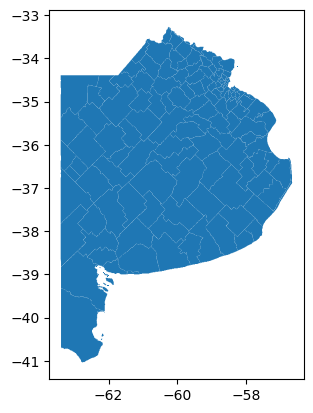

In [56]:
# Visualizamos los partidos
geo_df.plot()

In [57]:
# Limpieza de datos. Seguir las indicaciones en la consigna del TP para este paso.


In [58]:
# Grabamos los datos limpios en un nuevo archivo GeoJSON
geo_df.to_file('partidos_limpio.geojson', driver='GeoJSON')

In [59]:
# Creamos un DataFrame repit con los datos de repitencia siguiendo la consigna del TP





In [60]:
# Generamos un gráfico interactivo para el nivel de repitencia

# Si no existe chorpleth_map o alguna opcion del codigo en la siguiente celda, actualizar plotly con el siguiente comando y reiniciar el kernel.
#!pip install plotly --upgrade

# Si tienen algún error de Java después de instalar los paquetes actualizados y reiniciar el kernel, prueben refrescar el navegador con CTRL+F5.

In [ ]:
with open('partidos_limpio.geojson', 'r') as f:
    partidos = json.load(f)
    
fig = px.choropleth_map(
    repit, 
    geojson=partidos, 
    featureidkey = 'properties.cde',
    locations='cde',
    color='repitencia_secundaria',
    zoom = 4, 
    center = {"lat": -34.61315, "lon": -58.37723},
)

fig.show()

### Análisis exploratorio